In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from peptdeep.rescore.percolator import Percolator
import os

alphapept_hdf = os.path.expanduser('~/Workspace/Data/HeLa_500ng/HeLa_DDA_tims.ms_data.hdf')

In [3]:
from alphabase.io.psm_reader import psm_reader_provider
reader = psm_reader_provider.get_reader('alphapept', fdr=1, keep_decoy=True)
reader.import_file(alphapept_hdf)
select_col = 'spec_idx' #scan no
idx = reader.psm_df.groupby(select_col)['score'].idxmax()
psm_df = reader.psm_df.loc[idx]
psm_df.drop_duplicates([select_col,'sequence','mods'],inplace=True)
psm_df.sort_values(select_col)

rt  spec_idx  query_id  mobility      score  precursor_mz  \
23191    2.358303       498     24180  0.855388  18.030514    549.211975   
259410   2.534062       544     63144  0.723922  15.925869    513.581757   
232003   2.534062       552     83224  0.760560  23.631358    582.593603   
232014   2.534062       553     83225  0.797198  23.708700    582.593603   
15685    2.686883       579     20367  0.825216  20.431965    524.210003   
...           ...       ...       ...       ...        ...           ...   
182107  20.927873     55766     61462  1.014871  32.743932    760.420748   
273894  20.252299     55798    118520  1.000862  26.112362    752.657436   
193563  20.174618     55810     68075  0.843534  17.422746    530.296337   
295168  20.252299     55814    126909  1.061207  21.498282    850.729220   
233267  20.291160     55829     89127  1.104310  15.476523    904.958702   

        charge       raw_name                 sequence  \
23191        2  HeLa_DDA_tims                NMMAACDPR   
259410       3  HeLa_DDA_tims      AEGGGGGGRPGAPAAGDGK   
232003       3  HeLa_DDA_tims        DSRPSQAAGDNQGDEAK   
232014       3  HeLa_DDA_tims        DSRPSQAAGDNQGDEAK   
15685        2  HeLa_DDA_tims                YDDMAAAMK   
...        ...            ...                      ...   
182107       2  HeLa_DDA_tims          FGANAILGVSLAVCK   
273894       3  HeLa_DDA_tims     HNDDEQYAWESSAGGSFTVR   
193563       3  HeLa_DDA_tims          THINIVVIGHVDSGK   
295168       3  HeLa_DDA_tims  LCYVALDFEQEMATAASSSSLEK   
233267       2  HeLa_DDA_tims        SQVFSTAADGQTQVEIK   

                                             mods mod_sites  decoy  nAA  \
23191   Oxidation@M;Oxidation@M;Carbamidomethyl@C     2;3;6      0    9   
259410                                                           0   19   
232003                                                           0   17   
232014                                                           0   17   
15685                     Oxidation@M;Oxidation@M       4;8      0    9   
...                                           ...       ...    ...  ...   
182107                          Carbamidomethyl@C        14      0   15   
273894                                                           0   20   
193563                                                           0   15   
295168                          Carbamidomethyl@C         2      0   23   
233267                                                           0   17   

         rt_norm         ccs  
23191   0.112478  346.921480  
259410  0.120861  438.829896  
232003  0.120861  460.551566  
232014  0.120861  482.737389  
15685   0.128150  334.882727  
...          ...         ...  
182107  0.998146  410.179878  
273894  0.965925  604.983872  
193563  0.962220  511.192917  
295168  0.965925  641.007039  
233267  0.967778  445.683841  

[39597 rows x 15 columns]

In [4]:
from peptdeep.settings import global_settings
global_settings['percolator']['multiprocessing'] = False
perc = Percolator()
perc.model_mgr.nce = 30.0
perc.model_mgr.instrument = 'timsTOF'
perc.model_mgr.use_grid_nce_search = False
perc.feature_extractor.require_model_tuning = True
perc.feature_extractor.model_mgr.psm_num_to_train_ms2 = 1000
perc.feature_extractor.model_mgr.epoch_to_train_ms2 = 2
perc.feature_extractor.model_mgr.warmup_epoch_to_train_ms2 = 1
perc.feature_extractor.model_mgr.psm_num_to_train_rt_ccs = 1000
perc.feature_extractor.model_mgr.epoch_to_train_rt_ccs = 2
perc.feature_extractor.model_mgr.warmup_epoch_to_train_rt_ccs = 1
perc_df = perc.extract_features(psm_df, 
    ms2_file_type='alphapept', 
    ms2_file_dict={
        'HeLa_DDA_tims': alphapept_hdf
    }
)
perc_df

2022-09-25 15:42:32> Fine-tuning models ...
2022-09-25 15:42:32> Preparing for fine-tuning ...


100%|██████████| 1/1 [00:14<00:00, 14.31s/it]

2022-09-25 15:42:46> Fine-tuning ...
2022-09-25 15:42:46> 649 PSMs for CCS model training/transfer learning


2022-09-25 15:42:49> 1012 PSMs for RT model training/transfer learning
2022-09-25 15:42:54> 1150 PSMs for MS2 model training/transfer learning
2022-09-25 15:43:08> Fine-tuning done
2022-09-25 15:43:08> Extracting peptdeep features ...


100%|██████████| 1/1 [02:14<00:00, 134.28s/it]

2022-09-25 15:45:23> Finish extracting features


rt  spec_idx  query_id  mobility      score  precursor_mz  \
0      14.811912     36534     17809  0.821983  15.713466    507.243437   
1       5.562778      6129      7992  0.760560  12.402889    416.714580   
2       7.350258     11042     10657  0.779957  17.021423    448.711079   
3       8.632784     15729     10209  0.796121  15.945227    444.249470   
4       6.961679     10480     10770  0.825216  13.793756    449.721042   
...          ...       ...       ...       ...        ...           ...   
39592  19.125378     50704    130544  1.000862  36.460732    943.805461   
39593  14.850783     36559    132333  1.036422  13.597653   1041.168981   
39594  20.019165     53498    131110  1.008405  16.411243    974.187899   
39595   9.254545     17278    132113  0.978233  27.021416    772.590030   
39596  16.405245     42826    133009  1.084914  16.215382   1090.873164   

       charge       raw_name                     sequence               mods  \
0           2  HeLa_DDA_tims                      YNLDFWR                      
1           2  HeLa_DDA_tims                      CLVAVDR  Carbamidomethyl@C   
2           2  HeLa_DDA_tims                      FPDENFK                      
3           2  HeLa_DDA_tims                      ILEEDLR                      
4           2  HeLa_DDA_tims                      YCDSLLK  Carbamidomethyl@C   
...       ...            ...                          ...                ...   
39592       3  HeLa_DDA_tims  EGTDSSQGIPQLVSNISACQVIAEAVR  Carbamidomethyl@C   
39593       3  HeLa_DDA_tims  FTDFKLDGTGYGDYVKIYDGLEENPHK                      
39594       3  HeLa_DDA_tims  GLYGIKDDVFLSVPCILGQNGISDLVK  Carbamidomethyl@C   
39595       4  HeLa_DDA_tims  ATLELTHNWGTEDDETQSYHNGNSDPR                      
39596       3  HeLa_DDA_tims  IITNVIDQDIHLLGCHMINYFHTLFDK  Carbamidomethyl@C   

       ... matched_yion_rel_to_pred  pred_yion_rel_to_matched  pep_z1  pep_z2  \
0      ...                 1.000000                  0.796150       0       1   
1      ...                 0.000000                  0.000000       0       1   
2      ...                 1.000000                  0.918998       0       1   
3      ...                 1.000000                  0.574555       0       1   
4      ...                 1.000000                  0.916761       0       1   
...    ...                      ...                       ...     ...     ...   
39592  ...                 0.786659                  0.984719       0       0   
39593  ...                 0.000000                  0.000000       0       0   
39594  ...                 1.000000                  0.136106       0       0   
39595  ...                 0.354330                  0.062977       0       0   
39596  ...                 1.000000                  0.431663       0       0   

       pep_z3  pep_z4  pep_z5  pep_z6  pep_z_gt_6  mod_num  
0           0       0       0       0           0        0  
1           0       0       0       0           0        0  
2           0       0       0       0           0        0  
3           0       0       0       0           0        0  
4           0       0       0       0           0        0  
...       ...     ...     ...     ...         ...      ...  
39592       1       0       0       0           0        0  
39593       1       0       0       0           0        0  
39594       1       0       0       0           0        0  
39595       0       1       0       0           0        0  
39596       1       0       0       0           0        0  

[39597 rows x 88 columns]

In [5]:
df = perc_df.copy()
perc.cv_fold = 2
df = perc.re_score(df)
df

2022-09-25 15:45:23> [PERC] 24142 target PSMs at 0.01 psm-level FDR
2022-09-25 15:45:23> [PERC] Iteration 1 of Percolator ...
2022-09-25 15:45:24> [PERC] 28430 target PSMs at 0.01 psm-level FDR
2022-09-25 15:45:24> [PERC] Iteration 2 of Percolator ...
2022-09-25 15:45:25> [PERC] 30185 target PSMs at 0.01 psm-level FDR
2022-09-25 15:45:25> [PERC] Iteration 3 of Percolator ...
2022-09-25 15:45:26> [PERC] 30970 target PSMs at 0.01 psm-level FDR
2022-09-25 15:45:26> [PERC] Iteration 4 of Percolator ...
2022-09-25 15:45:28> [PERC] 31186 target PSMs at 0.01 psm-level FDR
2022-09-25 15:45:28> [PERC] Iteration 5 of Percolator ...
2022-09-25 15:45:29> [PERC] 31230 target PSMs at 0.01 psm-level FDR
2022-09-25 15:45:30> [PERC] 31230 target PSMs at 0.01 psm-level FDR


rt  spec_idx  query_id  mobility      score  precursor_mz  \
0      17.765243     46537    128942  1.063362  44.092899    896.131951   
1      19.125378     50817    130546  0.989009  42.691779    943.805461   
2      15.161719     37924    118788  1.236853  58.482517   1131.053869   
3      11.314310     24155    121151  1.256250  54.910542   1160.558864   
4      20.213452     54416    122967  1.298276  55.937848   1186.133207   
...          ...       ...       ...       ...        ...           ...   
39592  19.436253     51631     67520  1.082759  17.092858    792.868725   
39593  19.980322     52971     62716  1.028879  14.722478    767.391819   
39594  17.026893     44331    101896  0.902802  13.394891    653.993026   
39595  20.058032     54574     65106  1.052586  13.444099    779.913662   
39596  18.853359     50807     65389  1.019181  12.835001    781.411607   

       charge       raw_name                     sequence  \
0           3  HeLa_DDA_tims     LEQQVPVNQVFGQDEMIDVIGVTK   
1           3  HeLa_DDA_tims  EGTDSSQGIPQLVSNISACQVIAEAVR   
2           2  HeLa_DDA_tims   GGMGSGGLATGIAGGLAGMGGIQNEK   
3           2  HeLa_DDA_tims    AAAASAAEAGIATTGTEDSDDALLK   
4           2  HeLa_DDA_tims    DLSAAGIGLLAAATQSLSMPASLGR   
...       ...            ...                          ...   
39592       2  HeLa_DDA_tims               DTESRTTNGMTTVR   
39593       2  HeLa_DDA_tims                VIQANKEMESQLK   
39594       3  HeLa_DDA_tims             HMIIKRQAPEAMDIMK   
39595       2  HeLa_DDA_tims              AANINGSQVKRGSEK   
39596       2  HeLa_DDA_tims          KSGGGASGKSGSGAGGLAR   

                                      mods  ... matched_yion_rel_to_pred  \
0                                           ...                 0.717468   
1                        Carbamidomethyl@C  ...                 0.819172   
2                                           ...                 0.946004   
3                                           ...                 0.593511   
4                                           ...                 0.871851   
...                                    ...  ...                      ...   
39592                          Oxidation@M  ...                 0.000000   
39593                          Oxidation@M  ...                 0.000000   
39594  Oxidation@M;Oxidation@M;Oxidation@M  ...                 0.000000   
39595                                       ...                 0.000000   
39596                                       ...                 0.000000   

       pred_yion_rel_to_matched  pep_z1  pep_z2  pep_z3  pep_z4  pep_z5  \
0                      0.829432       0       0       1       0       0   
1                      0.984851       0       0       1       0       0   
2                      0.920678       0       1       0       0       0   
3                      0.882922       0       1       0       0       0   
4                      0.998540       0       1       0       0       0   
...                         ...     ...     ...     ...     ...     ...   
39592                  0.000000       0       1       0       0       0   
39593                  0.000000       0       1       0       0       0   
39594                  0.000000       0       0       1       0       0   
39595                  0.000000       0       1       0       0       0   
39596                  0.000000       0       1       0       0       0   

       pep_z6  pep_z_gt_6  mod_num  
0           0           0        0  
1           0           0        0  
2           0           0        0  
3           0           0        0  
4           0           0        0  
...       ...         ...      ...  
39592       0           0        1  
39593       0           0        1  
39594       0           0        3  
39595       0           0        0  
39596       0           0        0  

[39597 rows x 88 columns]

In [6]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode()
def plot_score_dist(df, x='ml_score'):
    fig = go.Figure()
    for decoy, df_group in df.groupby('decoy'):
        fig.add_histogram(x=df_group[x], name='decoy' if decoy else 'target')
    return fig

In [7]:
plot_score_dist(df, 'ml_score')

In [8]:
plot_score_dist(df, 'mobility_delta')

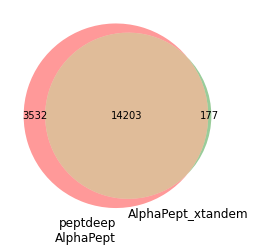

In [9]:
from matplotlib_venn import venn2
from peptdeep.rescore.fdr import calc_fdr_for_df
df_fdr = df[(df.fdr<0.01)&(df.decoy==0)]
ap_df = calc_fdr_for_df(df, 'score')
ap_df = ap_df[(ap_df.fdr<0.01)&(ap_df.decoy==0)]
venn2(
    [set(df_fdr.sequence.values), set(ap_df.sequence.values)],
    ['peptdeep\nAlphaPept','AlphaPept_xtandem']
)